In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('KTM Raw data.xlsx')

In [3]:
df.head()

,ID,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,1,53,Male,Professional,Average,180 to 220,Complicated,Not purchased
1,2,27,Female,Self Employed,Low End,No Bike,Single,Purchased
2,3,39,Female,Unemployed,Average,180 to 220,Married,Not purchased
3,4,20,Female,Unemployed,High End,No Bike,Married,Not purchased
4,5,29,Male,Student,Average,180 to 220,Complicated,Purchased


In [4]:
df.drop("ID", axis=1, inplace = True)

In [5]:
le = LabelEncoder()

In [6]:
for i in df.columns:
    df[i]= le.fit_transform(df[i])

In [7]:
df.head()

,Age,Gender,Occupation,Phone Type,Current Bike,Relationship,Response
0,35,1,0,0,1,1,0
1,9,0,1,2,4,3,1
2,21,0,3,0,1,2,0
3,2,0,3,1,4,2,0
4,11,1,2,0,1,1,1


In [8]:
x = df.drop("Response", axis = 1)
y = df[["Response"]]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=42)

In [10]:
model = Sequential([
    Dense(50, activation = "tanh", input_shape = (6,)),
    Dense(100, activation="relu"),
    Dense(1,activation="sigmoid")])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                350       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 5,551
Trainable params: 5,551
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer = "Adam", loss ="binary_crossentropy", metrics= "accuracy")

In [13]:
history = model.fit(x_train, y_train, batch_size=100, epochs=10, validation_data=(x_test,y_test))

Epoch 1/10
11/11 [==============================] - 2s 72ms/step - loss: 0.6671 - accuracy: 0.6073 - val_loss: 0.5636 - val_accuracy: 0.7719
Epoch 2/10
11/11 [==============================] - 0s 12ms/step - loss: 0.5531 - accuracy: 0.7702 - val_loss: 0.4899 - val_accuracy: 0.7763
Epoch 3/10
11/11 [==============================] - 0s 13ms/step - loss: 0.5238 - accuracy: 0.7646 - val_loss: 0.4766 - val_accuracy: 0.7807
Epoch 4/10
11/11 [==============================] - 0s 12ms/step - loss: 0.5182 - accuracy: 0.7750 - val_loss: 0.4663 - val_accuracy: 0.7785
Epoch 5/10
11/11 [==============================] - 0s 13ms/step - loss: 0.5050 - accuracy: 0.7561 - val_loss: 0.4627 - val_accuracy: 0.7807
Epoch 6/10
11/11 [==============================] - 0s 12ms/step - loss: 0.4949 - accuracy: 0.7750 - val_loss: 0.4628 - val_accuracy: 0.7807
Epoch 7/10
11/11 [==============================] - 0s 13ms/step - loss: 0.4886 - accuracy: 0.7740 - val_loss: 0.4597 - val_accuracy: 0.7873
Epoch 8/10
11

## Accuracy Plots

In [14]:
history.history["accuracy"]

[0.6073446273803711,
 0.770244836807251,
 0.764595091342926,
 0.7749529480934143,
 0.756120502948761,
 0.7749529480934143,
 0.7740113139152527,
 0.7711864113807678,
 0.7749529480934143,
 0.7749529480934143]

In [15]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


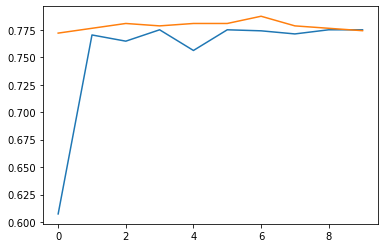

In [16]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])